# Exploring Terrorism Worldwide
---
### Matt Speck

# Agenda
---

* Overview of Data
* Objective
* Breakdown of Global Attacks
* Terror in Colombia pre/post 2002
* Bombings in 1993
* Questions

# Overview of Data
---

#### Details of terror attacks from 1970 through 2015

#### Includes specifics on locations, perpetrators, victims, and the incident (eg. attack type)

#### We'll be looking mostly at attack types and number of attacks

# Objectives
---
#### Understand general trends of attacks over time, globally
#### Use GTD to predict terrorist activity
#### Impute missing 1993 attacks

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('../../../../../Desktop/proj_4_data/original_data/globalterrorismdb_0616.csv',
                 low_memory=False, skipinitialspace=True)

In [14]:
#Create datafram without 0s for month and day
df2 = pd.DataFrame(df[(df['imonth'] != 0) & (df['iday'] != 0)])

In [15]:
del df

In [21]:
df2.reset_index(inplace=True)

In [23]:
df2.drop('index',inplace=True,axis=1)

In [24]:
df2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
1,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
3,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
4,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [25]:
#df['date'] = df['iyear'].str + '-' + df['imonth'].str + '-' + df['iday'].str
#http://stackoverflow.com/questions/31869257/python-pandas-combine-columns-into-a-date
from datetime import datetime
df2['date']= df2.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['iyear'],
                                                                     x['imonth'], 
                                                                     x['iday']), 
                                                "%Y %m %d"),axis=1)

In [13]:
df2.shape

(155878, 138)

In [6]:
!pwd

/Users/mjspeck/Documents/Local_GA_Repos/DC-DSI4/projects/04-project


In [26]:
df2.drop(['iyear','imonth','iday'], axis=1, inplace=True)

In [27]:
def colmns(dataframe):
    for i in dataframe.columns:
        print i
    return

In [28]:
colmns(df2)

eventid
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
ingroup
ingroup2
ingroup3
gsubname3
motive
guncertain1
guncertain2
guncertain3
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weaptype

In [29]:
#Add back year and month columns
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month

In [30]:
#Day with most attacks was June 14, 2014 (96 attacks)
df2['date'].describe()

count                  155878
unique                  15334
top       2014-06-14 00:00:00
freq                       96
first     1970-01-01 00:00:00
last      2015-12-31 00:00:00
Name: date, dtype: object

In [11]:
#Remove unnecessary index
#df2.set_index('eventid',inplace=True)
#Decided I don't actually want to do this

In [27]:
df2.attacktype1_txt.unique()

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking', 'Unknown',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [35]:
#Creating dictionary of dataframes that contain only entries based on attack type 1
attack_dfs = {}
for i in df2.attacktype1_txt.unique():
    attack_dfs[i] = df2[df2.attacktype1_txt == i].sort_values('date')
    attack_dfs[i].reset_index(inplace=True)
    attack_dfs[i].drop('index',axis=1,inplace=True)

In [46]:
import matplotlib.pyplot as plt

# How Do Attacks Vary Over Time?

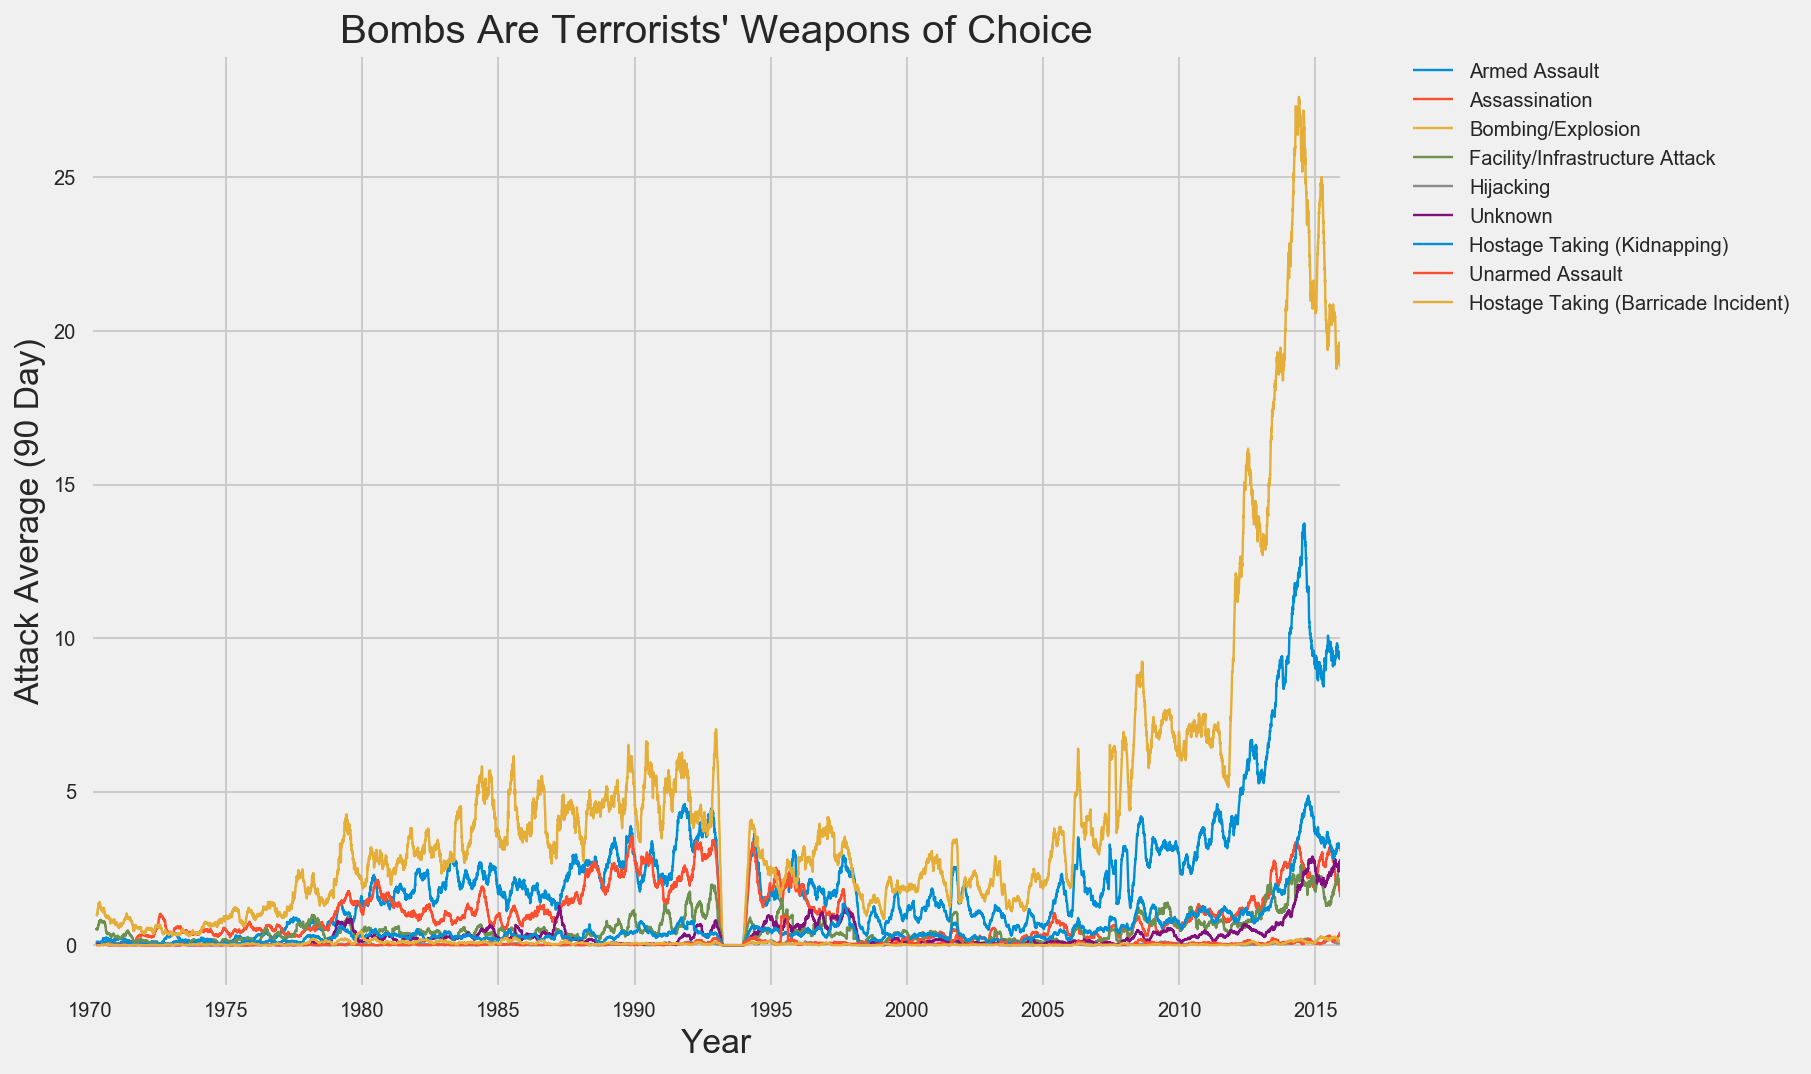

In [203]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 22
plt.style.use('fivethirtyeight')
idx = pd.date_range('01-01-1970', '12-31-2015')
for i in attacks:
    attack_dfs[i]['date'].value_counts().sort_index().reindex(idx, fill_value=0).loc[pd.to_datetime('1970-01-01'):pd.to_datetime('2015-12-31')].rolling(window=90).mean().plot(label=i, linewidth=1.2)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Bombs Are Terrorists\' Weapons of Choice')
plt.xlabel('Year')
plt.ylabel('Attack Average (90 Day)')
plt.show()

In [100]:
df2.attacktype1_txt.value_counts()

Bombing/Explosion                      75638
Armed Assault                          37433
Assassination                          17460
Hostage Taking (Kidnapping)             8971
Facility/Infrastructure Attack          8768
Unknown                                 5407
Hostage Taking (Barricade Incident)      829
Unarmed Assault                          820
Hijacking                                552
Name: attacktype1_txt, dtype: int64

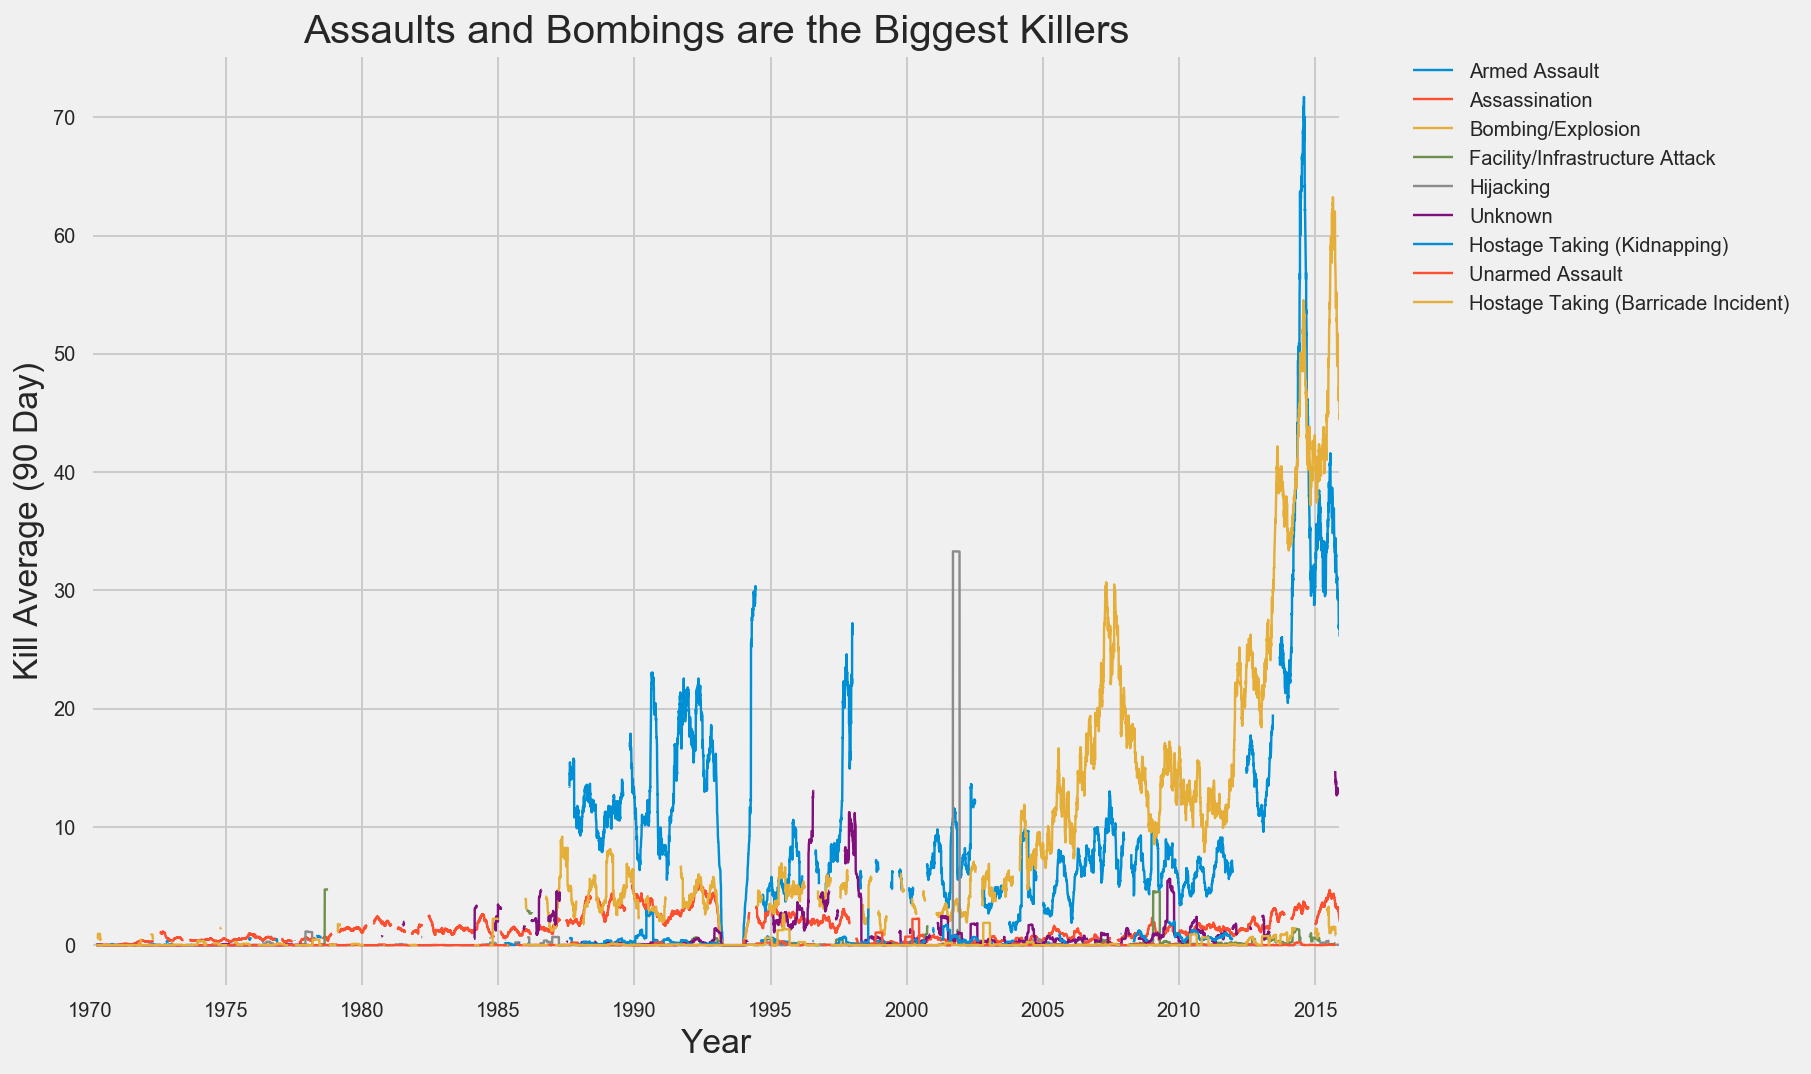

In [204]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.style.use('fivethirtyeight')
idx = pd.date_range('01-01-1970', '12-31-2015')
for i in attacks:
    attack_dfs[i].groupby('date').nkill.sum().sort_index().reindex(idx, fill_value=0).loc[pd.to_datetime('1970-01-01'):pd.to_datetime('2015-12-31')].rolling(window=90).mean().plot(label=i, linewidth=1.2)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Assaults and Bombings are the Biggest Killers')
plt.xlabel('Year')
plt.ylabel('Kill Average (90 Day)')
plt.show()

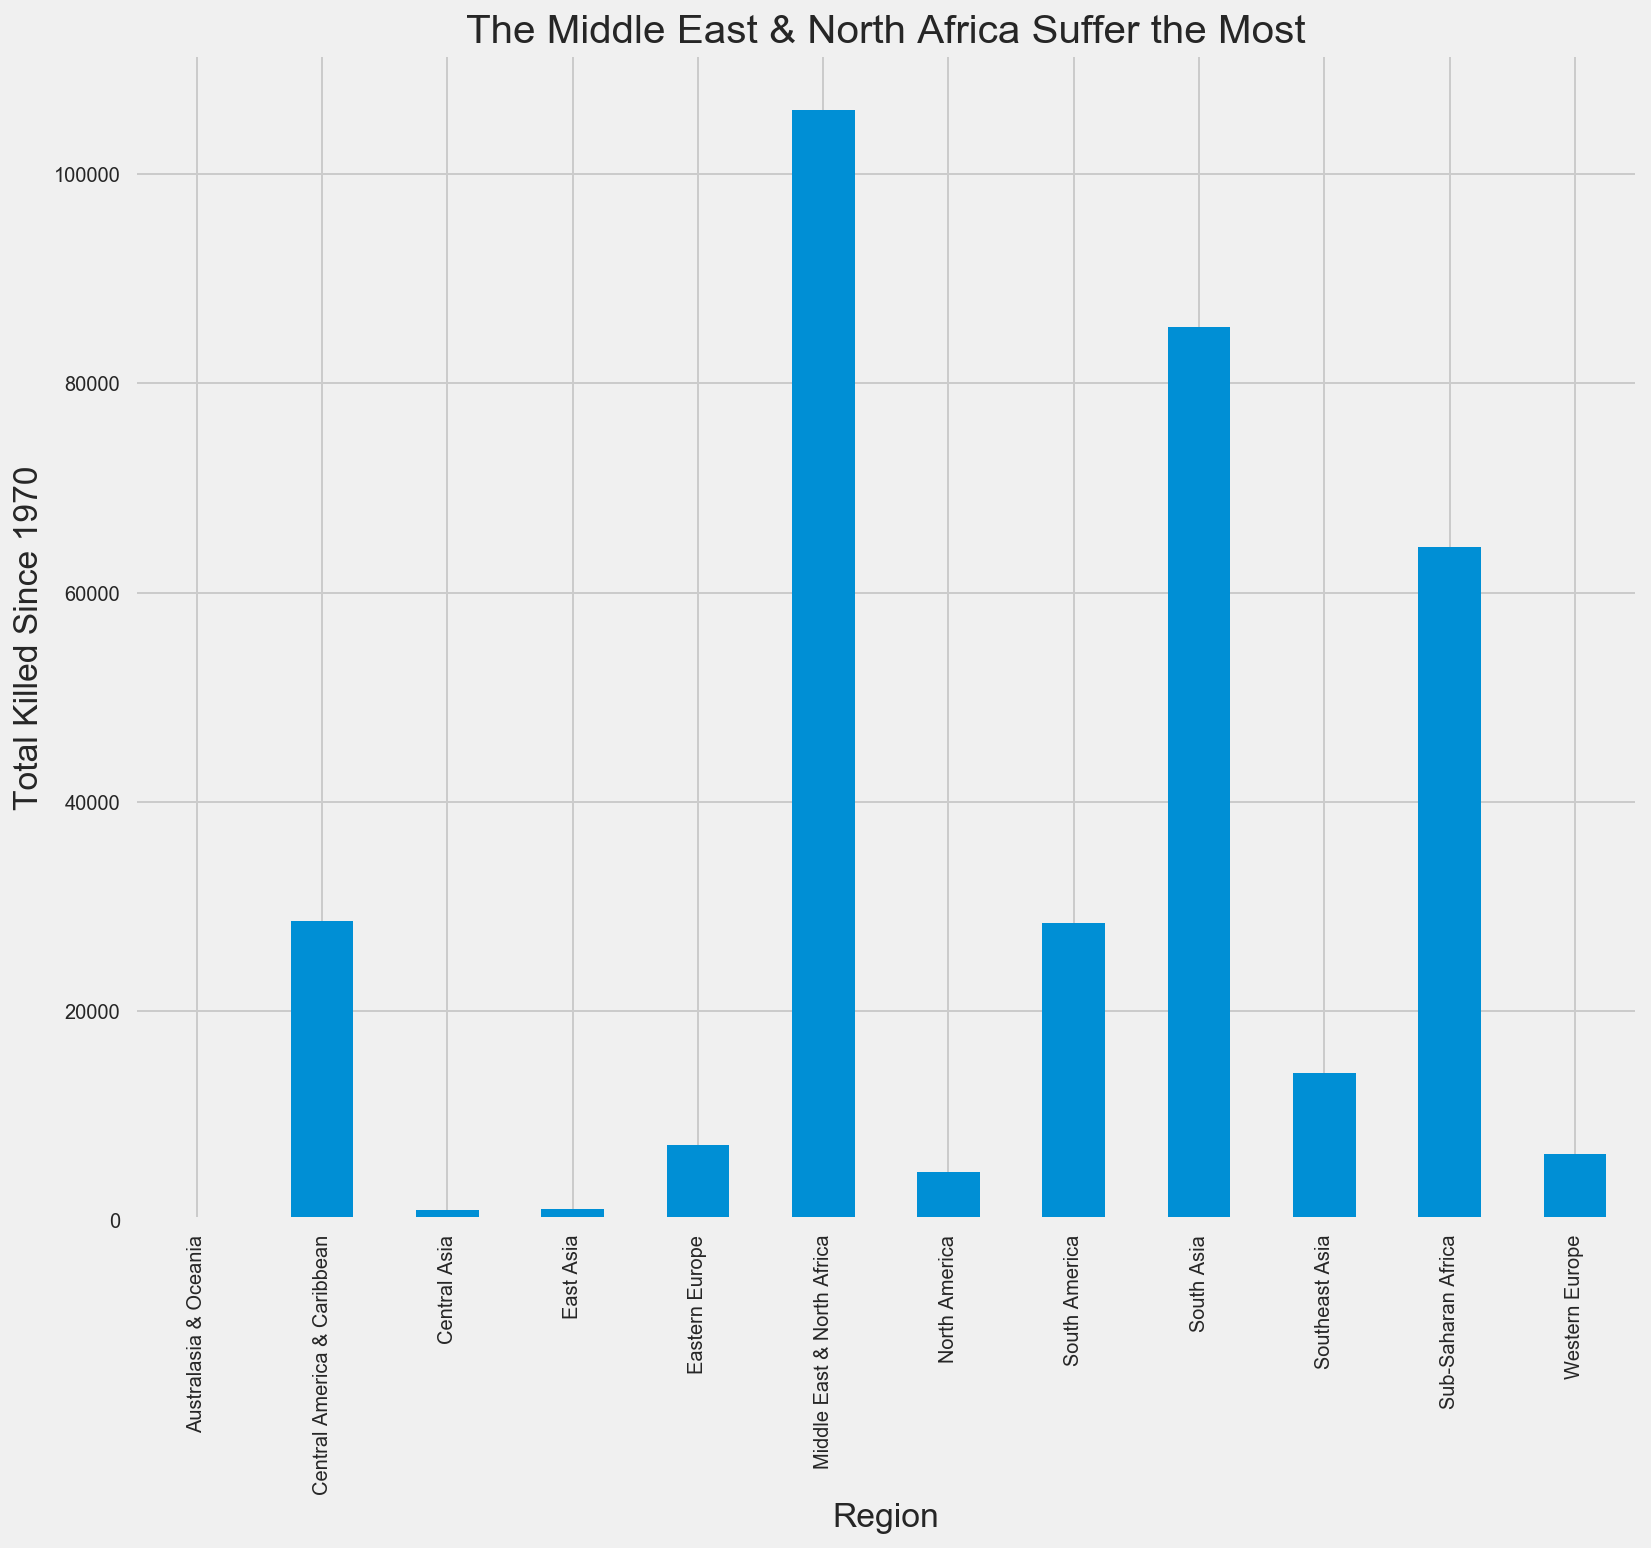

In [207]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 17
plt.style.use('fivethirtyeight')
df2.groupby('region_txt').nkill.sum().plot(kind='bar')
plt.title('The Middle East & North Africa Suffer the Most')
plt.xlabel('Region')
plt.ylabel('Total Killed Since 1970')
plt.show()

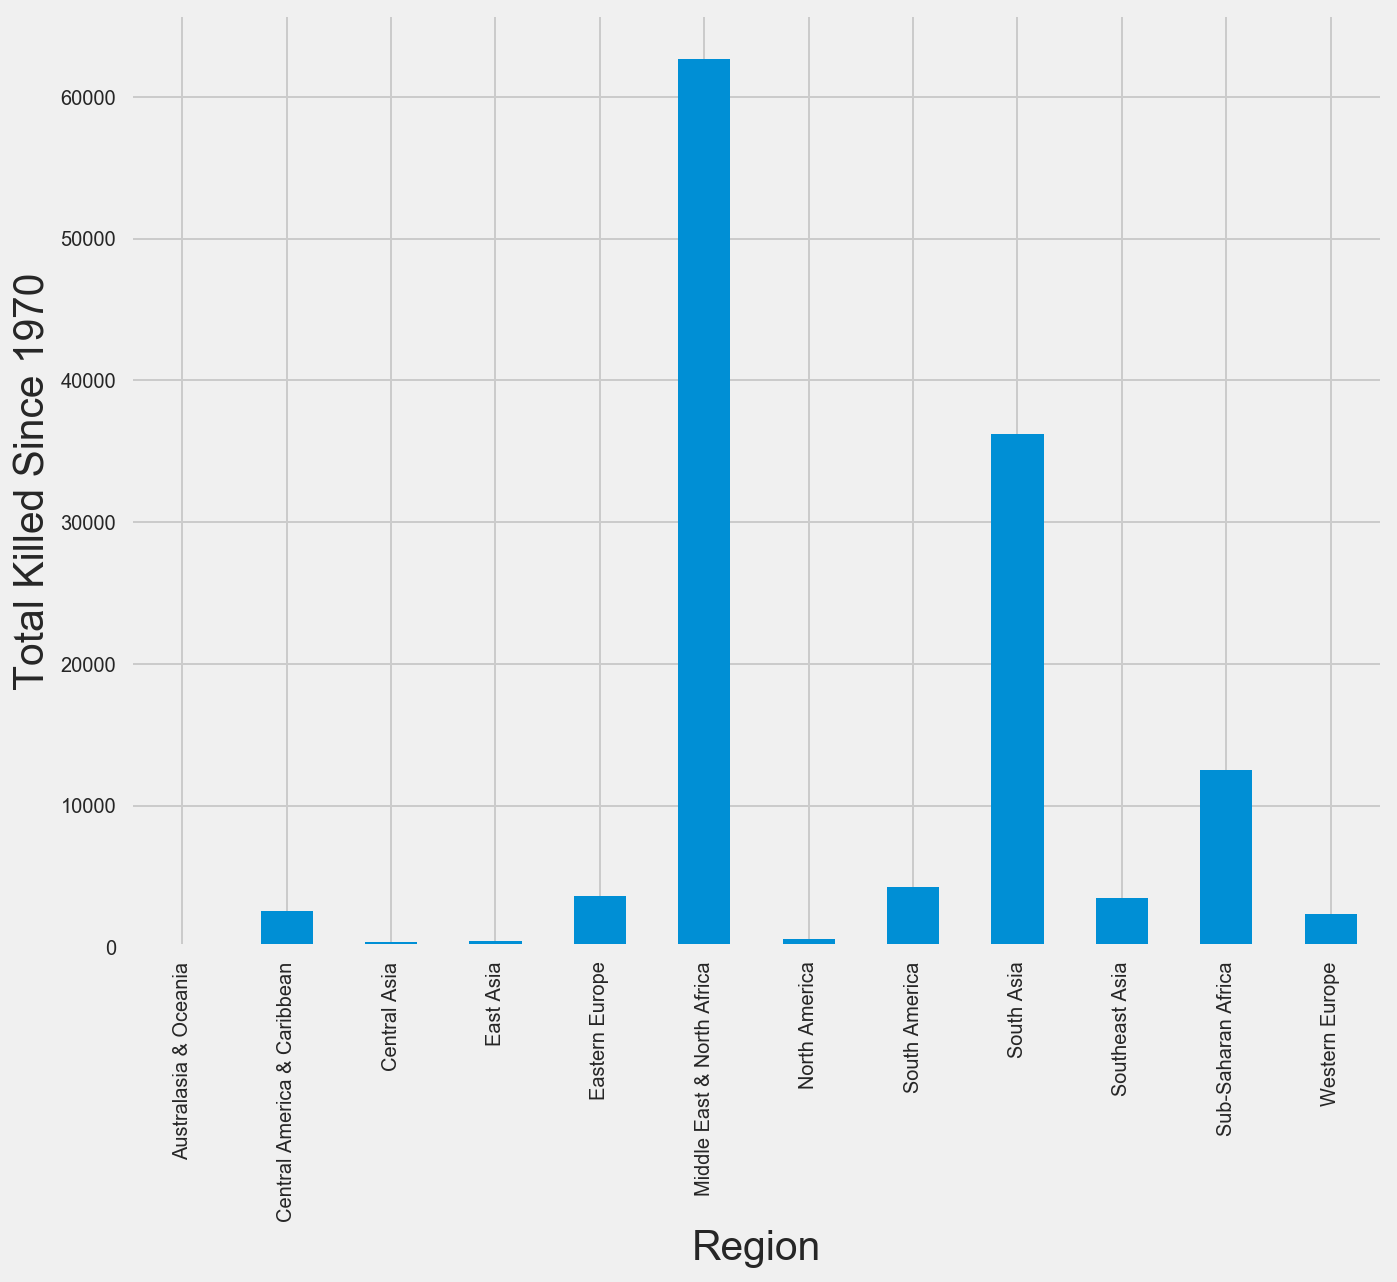

In [208]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 17
attack_dfs['Bombing/Explosion'].groupby('region_txt').nkill.sum().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Killed Since 1970')
plt.show()

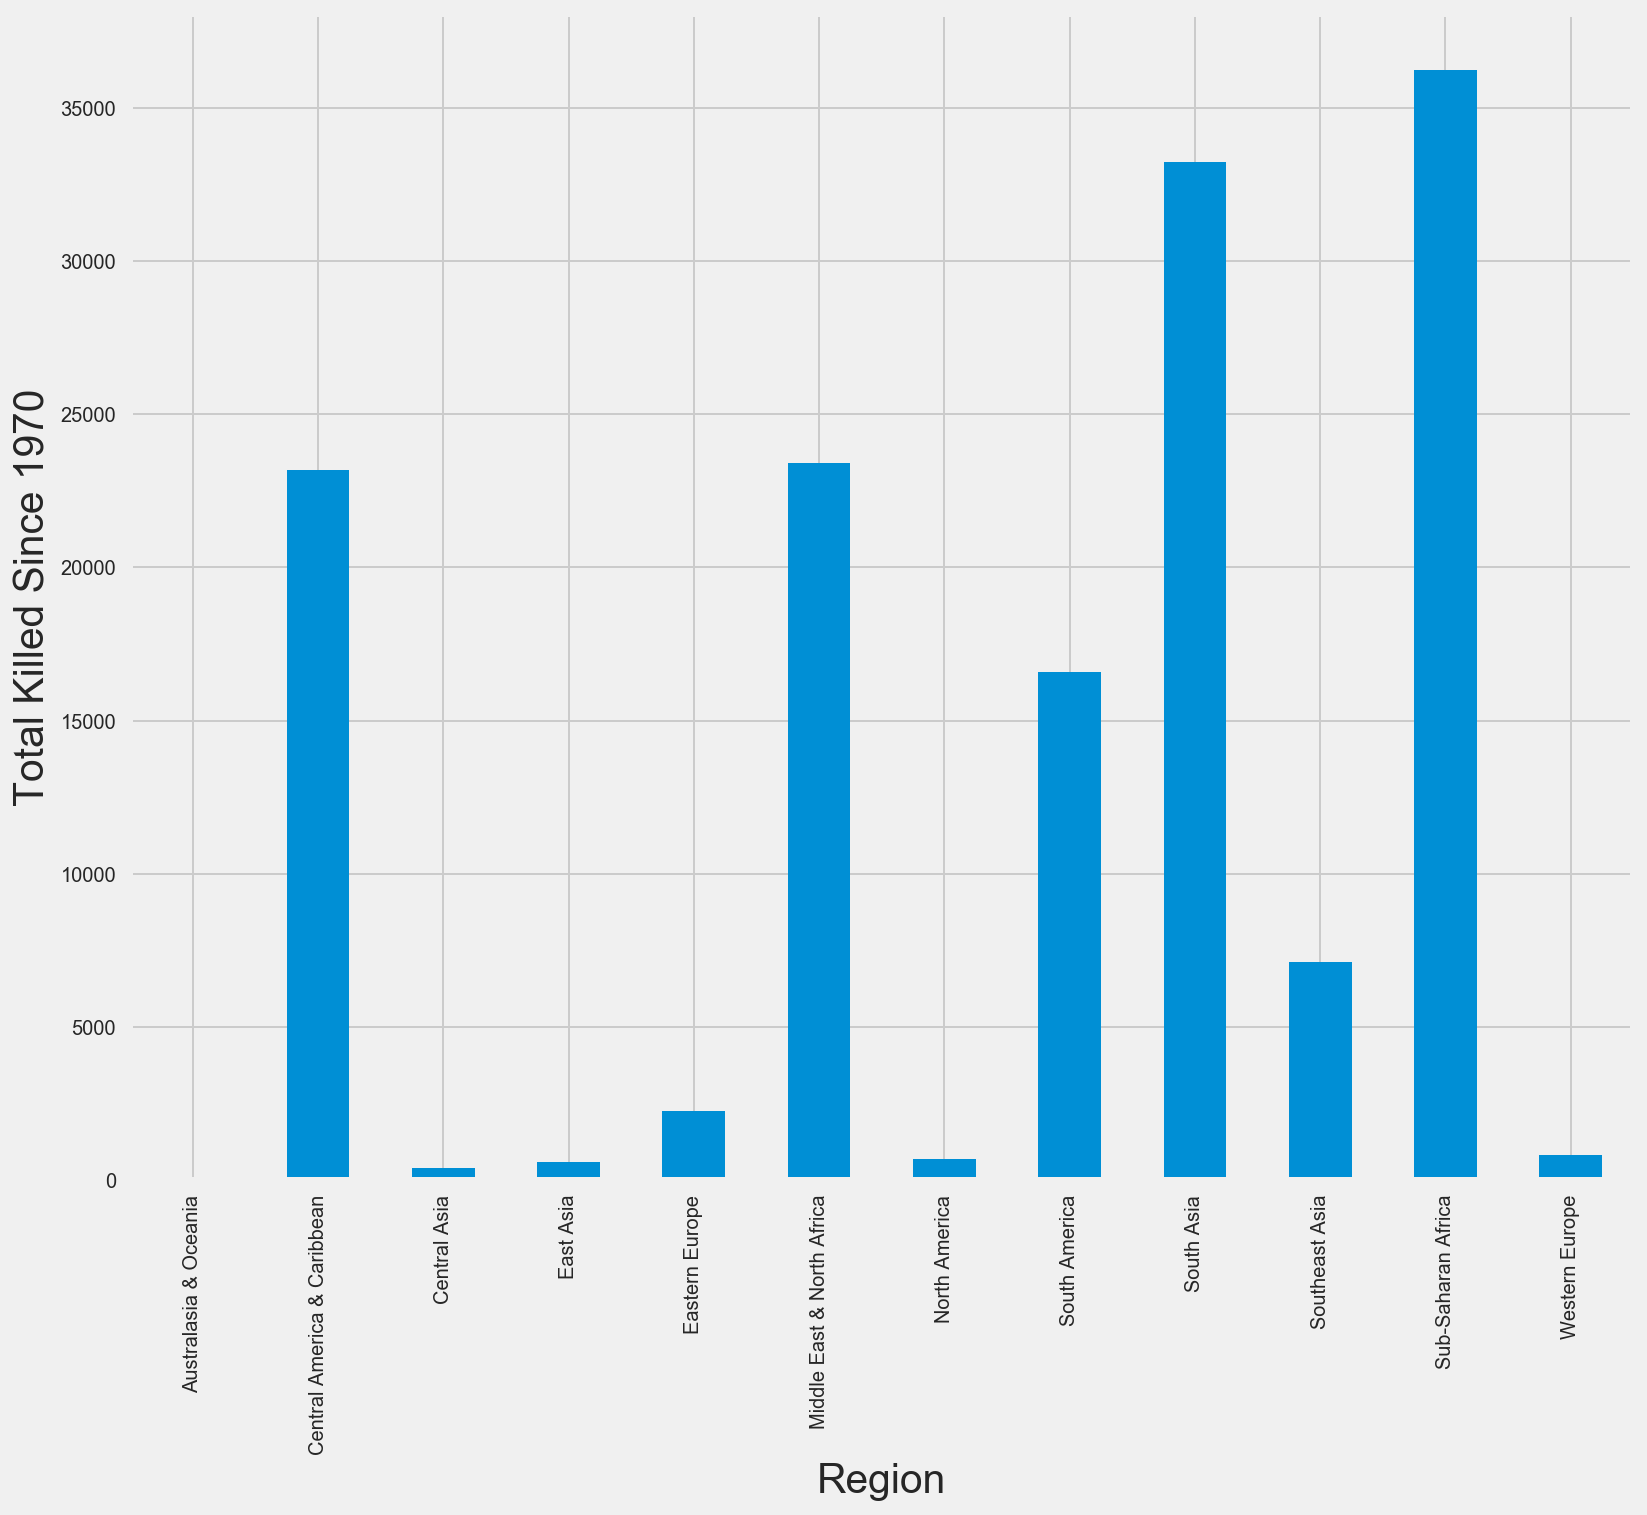

In [209]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 17
attack_dfs['Armed Assault'].groupby('region_txt').nkill.sum().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Killed Since 1970')
plt.show()

# Part 2: Bayes in Columbia
---
### In 2002 Alvaro Uribe is elected President, promises to 'confront' FARC and ELN

In [122]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [123]:
import pymc3 as pm

Couldn't import dot_parser, loading of dot files will not be possible.


In [145]:
# FARC has had a couple incidents outside Colombia. We'll ignore those in the future
df2[df2.gname == 'Revolutionary Armed Forces of Colombia (FARC)'].country_txt.value_counts()

Colombia     2434
Venezuela       9
Peru            4
Ecuador         2
Panama          2
Brazil          1
Name: country_txt, dtype: int64

In [147]:
# Same with Venezuela
df2[df2.gname == 'National Liberation Army of Colombia (ELN)'].country_txt.value_counts()

Colombia     1372
Venezuela      32
Name: country_txt, dtype: int64

In [140]:
df2[(df2.country == 45) & (df2.gname == 'National Liberation Army of Colombia (ELN)') & (df2.date < pd.to_datetime('2002-01-01'))].shape

(1189, 137)

In [138]:
df2[df2.country == 45].gname.value_counts()

Revolutionary Armed Forces of Colombia (FARC)                          2434
Unknown                                                                2015
National Liberation Army of Colombia (ELN)                             1372
M-19 (Movement of April 19)                                             541
Narco-Terrorists                                                        349
Popular Liberation Army (EPL)                                           254
Simon Bolivar Guerrilla Coordinating Board (CGSB)                       202
Death Squad                                                             171
The Extraditables                                                       109
Left-Wing Guerrillas                                                     89
Ricardo Franco Front (Dissident FARC)                                    62
United Self Defense Units of Colombia (AUC)                              57
Paramilitaries                                                           36
Gunmen      

Going to look at ELN and FARC pre and post 2002 (Alvaro Uribe's presidency)

In [141]:
import numpy as np
import seaborn as sns

In [ ]:
1970+

In [ ]:
attack_dfs[i]['date'].value_counts().sort_index().reindex(idx, fill_value=0).loc[pd.to_datetime('1970-01-01'):pd.to_datetime('2015-12-31')]

In [148]:
#Divide up data
eln_before_02 = df2[(df2.country == 45) & (df2.gname == 'National Liberation Army of Colombia (ELN)') & (df2.date < pd.to_datetime('2002-01-01'))]
eln_after_02 = df2[(df2.country == 45) & (df2.gname == 'National Liberation Army of Colombia (ELN)') & (df2.date >= pd.to_datetime('2002-01-01'))]   
farc_before_02 = df2[(df2.country == 45) & (df2.gname == 'Revolutionary Armed Forces of Colombia (FARC)') & (df2.date < pd.to_datetime('2002-01-01'))]     
farc_after_02 = df2[(df2.country == 45) & (df2.gname == 'Revolutionary Armed Forces of Colombia (FARC)') & (df2.date >= pd.to_datetime('2002-01-01'))] 

In [149]:
data_sets = ['eln_before_02', 'eln_after_02', 'farc_before_02', 'farc_after_02']

In [156]:
#I'm going to assume that the distribution of my data does not change, so my prior will just be the mean and std of
#the number of yearly attacks for each group
farc_prior_mean = farc_before_02['year'].value_counts().mean()
farc_prior_std = farc_before_02['year'].value_counts().std()
eln_prior_mean = eln_before_02['year'].value_counts().mean()
eln_prior_std = eln_before_02['year'].value_counts().std()

In [211]:
#The priors
print farc_prior_mean
print eln_prior_mean
print farc_prior_std
print eln_prior_std

51.3076923077
44.037037037
33.5317989148
39.8414950691


In [157]:
with pm.Model() as model:

    farc_mean = pm.Normal('farc_mean', farc_prior_mean, sd=farc_prior_std)
    eln_mean = pm.Normal('eln_mean', eln_prior_mean, sd=eln_prior_std)

In [158]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    farc_std = pm.Uniform('farc_std', lower=std_prior_lower, upper=std_prior_upper)
    eln_std = pm.Uniform('eln_std', lower=std_prior_lower, upper=std_prior_upper)

In [161]:
eln_observed = eln_after_02['year'].value_counts()
farc_observed = farc_after_02['year'].value_counts()

In [162]:
with model:

    farc_group = pm.Normal('farc', mu=farc_mean, sd=farc_std, observed=farc_observed)
    eln_group = pm.Normal('eln', mu=eln_mean, sd=eln_std, observed=eln_observed)

In [163]:
with model:

    diff_of_means = pm.Deterministic('difference of means', farc_mean - eln_mean)
    diff_of_stds = pm.Deterministic('difference of stds', farc_std - eln_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((farc_std**2 + eln_std**2) / 2))

In [164]:
with model:
    trace = pm.sample(25000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -133.78: 100%|██████████| 200000/200000 [00:19<00:00, 10508.46it/s]
Finished [100%]: Average ELBO = -133.78
100%|██████████| 25000/25000 [03:05<00:00, 134.55it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14cf1f450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14d5e0190>], dtype=object)

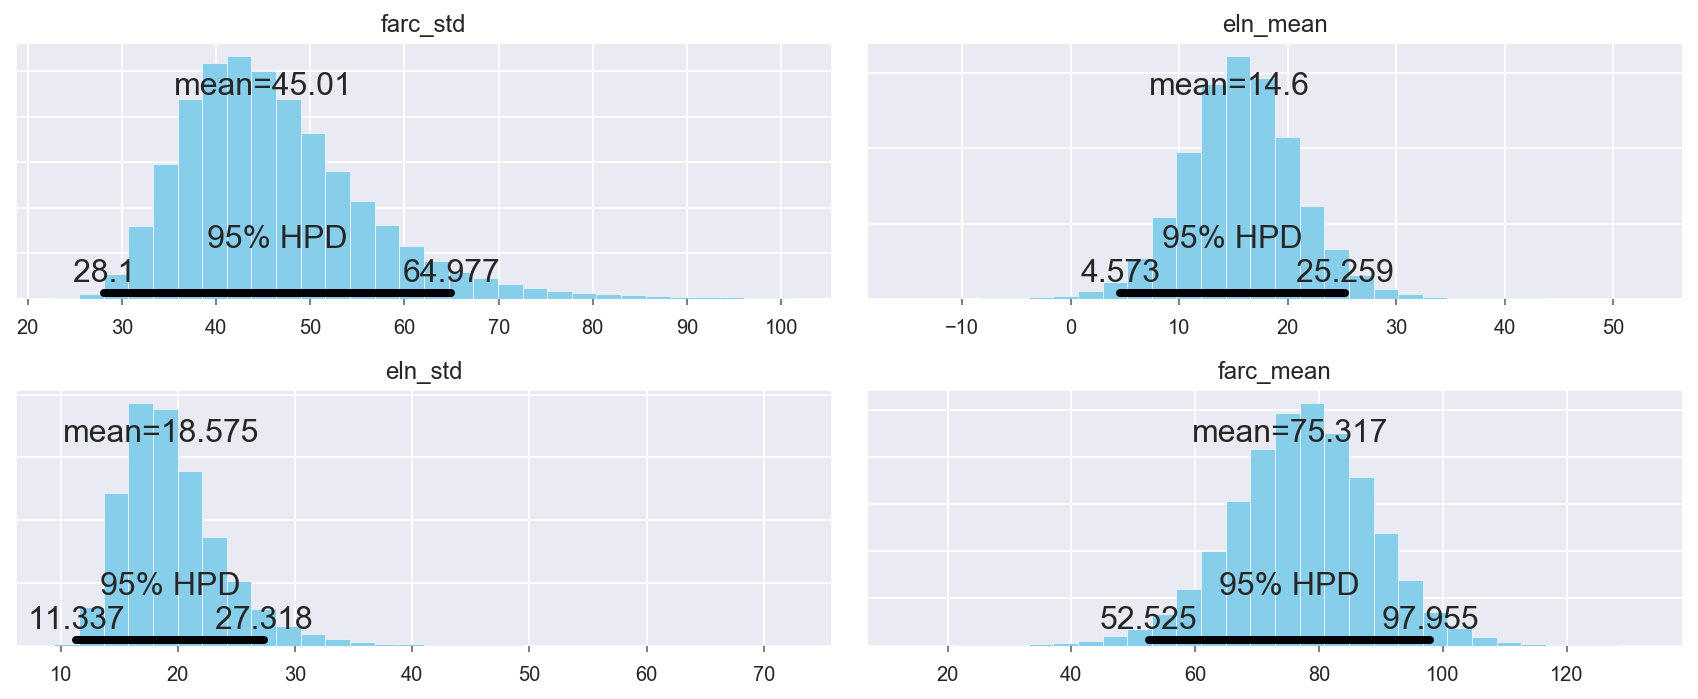

In [166]:
pm.plot_posterior(trace[3000:],
                  varnames=['farc_mean', 'eln_mean', 'farc_std', 'eln_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13a4f6fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13a3c4c50>], dtype=object)

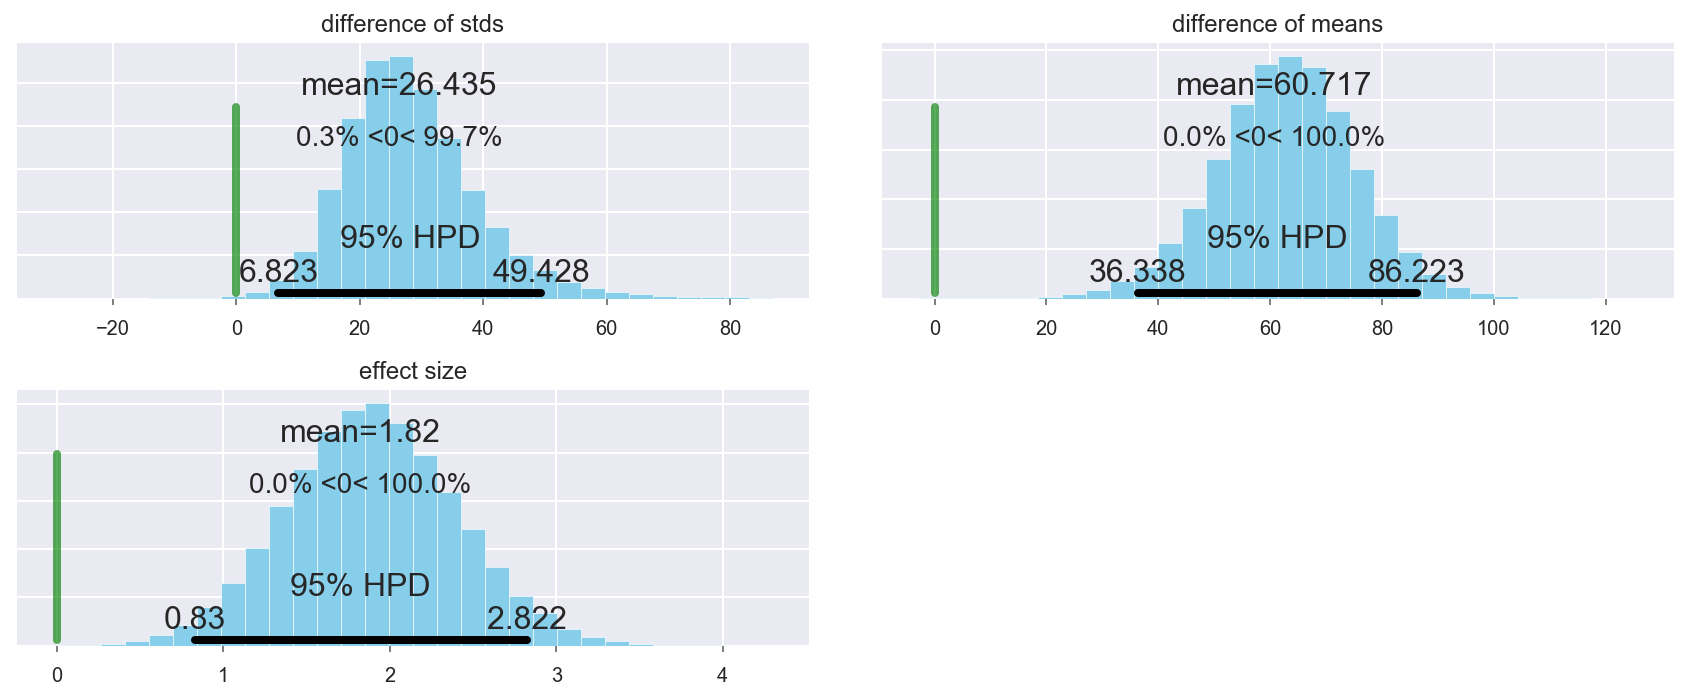

In [165]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Part (Ninety) Three:

In [167]:
from statsmodels.graphics.tsaplots import plot_acf

/Users/mjspeck/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [169]:

for i in df2.region_txt.unique()

array(['North America', 'South America', 'Western Europe',
       'Eastern Europe', 'Sub-Saharan Africa',
       'Central America & Caribbean', 'Southeast Asia',
       'Middle East & North Africa', 'East Asia', 'Australasia & Oceania',
       'South Asia', 'Central Asia'], dtype=object)

In [183]:
#create dataframes by region with data from before 1993
regions_dfs = {}
for i in df2.region_txt.unique():
    regions_dfs[i] = df2[(df2.region_txt == i) & (df2.year < 1993)].sort_values('date')
    regions_dfs[i].reset_index(inplace=True)
    regions_dfs[i].drop('index',axis=1,inplace=True)

In [179]:
regions_dfs.keys()

['East Asia',
 'Eastern Europe',
 'Southeast Asia',
 'Australasia & Oceania',
 'North America',
 'South America',
 'Sub-Saharan Africa',
 'Central Asia',
 'Middle East & North Africa',
 'South Asia',
 'Western Europe',
 'Central America & Caribbean']

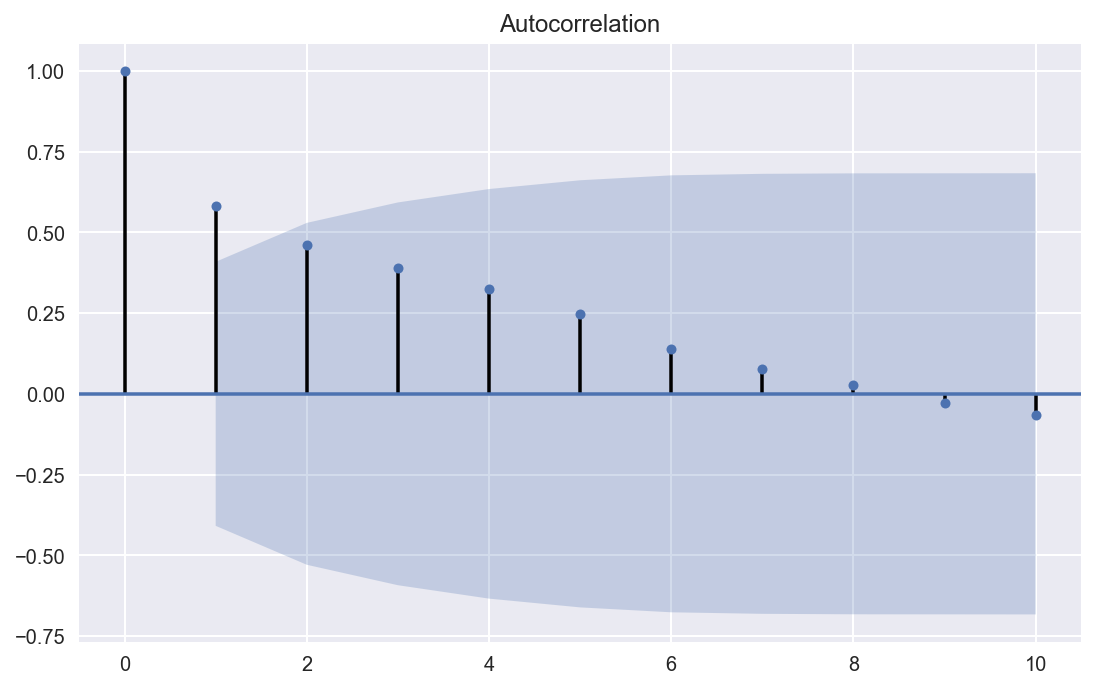

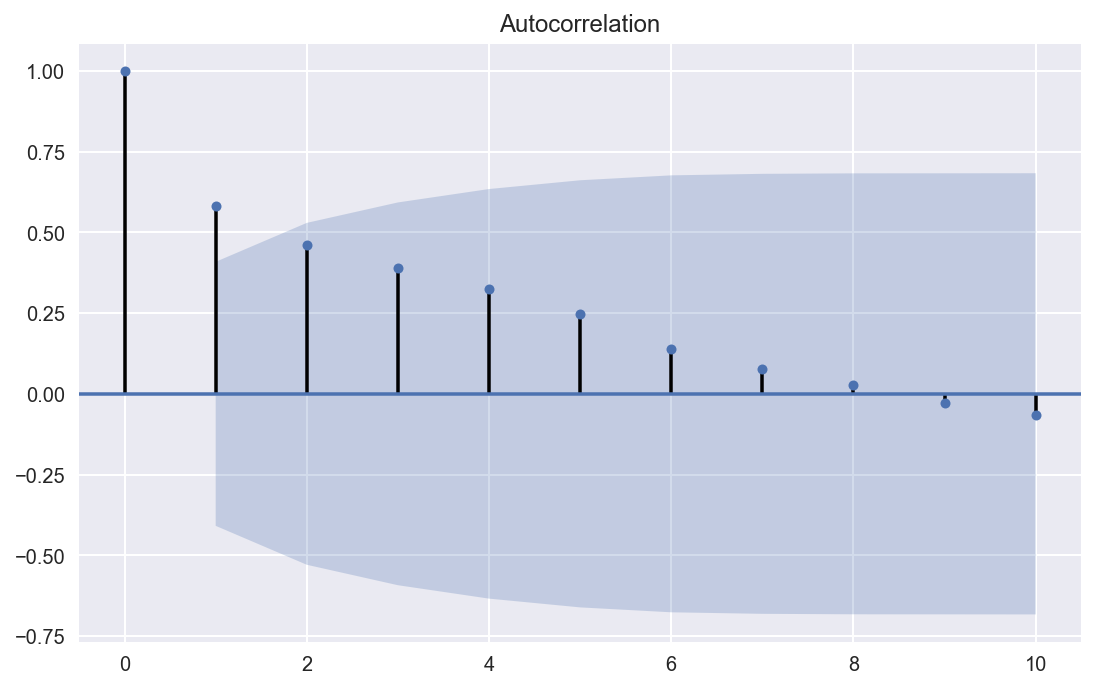

In [187]:
plot_acf(regions_dfs['Middle East & North Africa'].year.value_counts(), lags=10)

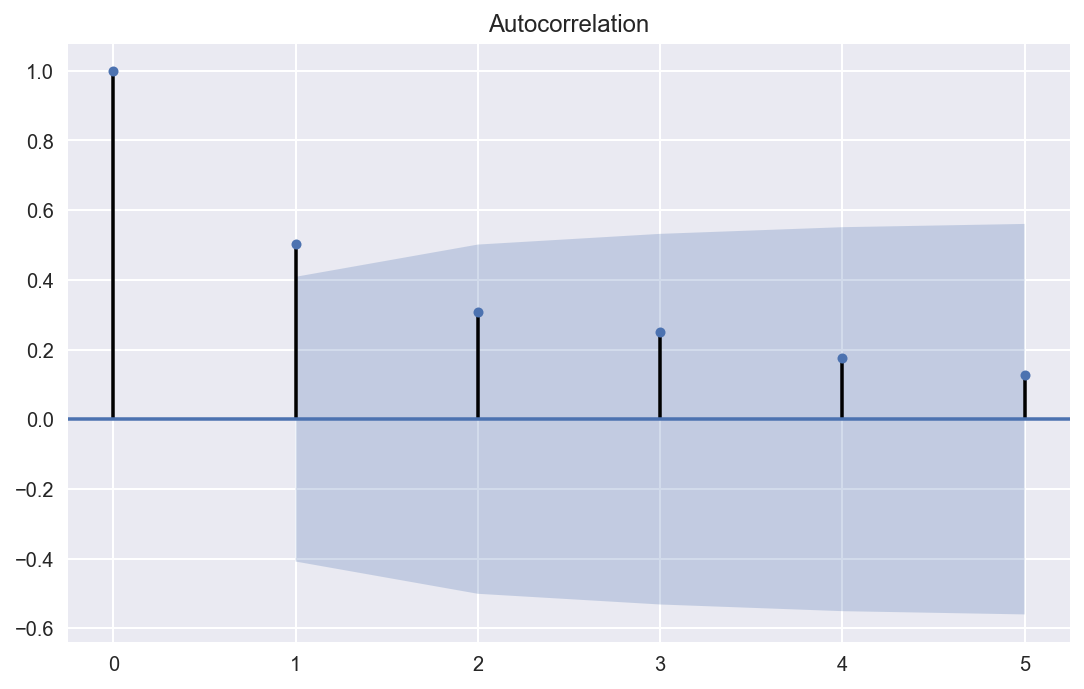

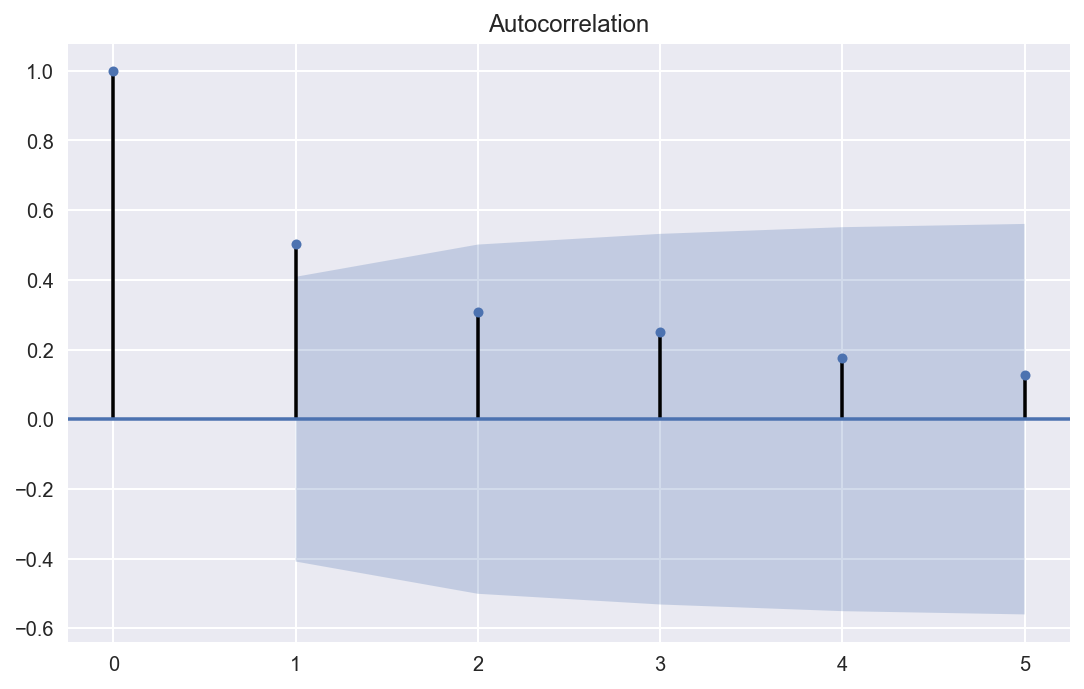

In [186]:
plot_acf(regions_dfs['North America'].year.value_counts(), lags=5)

### Bombings in 1992: 1736
### Bombings in 1994: 1153

### Mean (Imputed Bombings in 1993): 1445

# Questions?

In [173]:
len(df2[(df2.year == 1992) & (df2.attacktype1_txt == 'Bombing/Explosion')])
#plot_acf(store1_data.Sales, lags=10)

1736

In [174]:
len(df2[(df2.year == 1994) & (df2.attacktype1_txt == 'Bombing/Explosion')])

1153